# AI+X R-Py 중간과제

## Part 2

- 보스턴 주택 가격 데이터의 변수명은 다음과 같다.
|변수명|설명|
|---|------------------------|
|CRIM|자치시(town) 별 1인당 범죄율|
|ZN|25,000 평방피트를 초과하는 거주지역의 비율|
|INDUS|비소매상업지역이 점유하고 있는 토지의 비율|
|CHAS|찰스강에 대한 더미변수 (강의 경계에 위치한 경우는 1, 아니면 0)|
|NOX|10ppm 당 농축 일산화질소|
|RM|주택 1가구당 평균 방의 개수|
|AGE|1940년 이전에 건축된 소유주택의 비율|
|DIS|5개의 보스턴 직업센터까지의 접근성 지수|
|RAD|방사형 도로까지의 접근성 지수|
|TAX|10,000 달러 당 재산세율|
|PTRATIO|자치시(town)별 학생/교사 비율|
|B|1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함. |
|LSTAT|모집단의 하위계층의 비율(%)|
|MEDV|본인 소유의 주택가격(중앙값) (단위: $1,000)|
|CAT.MEDV|MEDV가 30,000 달러를 넘는지에 대한 변수(넘는 경우 1, 아닌 경우 0)|

- 보스턴 주택 가격 데이터에서 결측치는 na와 NaN으로 표시되어 있다. 

In [1]:
from sklearn.linear_model import LinearRegression 
from  sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns

Q5. 다음과 같은 데이터 전처리를 시행하라.
1. 제공된 boston_csv.csv 파일을 사용하여 pandas 데이터 프레임 객체를 만든다, 결측치 코드인 na와 NaN이 모두 실제 결측치로 되도록 한다.  
2. 이와 같은 결측치가 있는 관측치를 모두 제거한다.


In [50]:
df = pd.read_csv('./boston_csv.csv')
df = df.replace("na", np.nan)
df = df.replace('NaN", np.nan)')
df = df.dropna(axis=0)
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
5    0.02985   0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222   
6    0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
499  0.17783   0.0   9.69     0  0.585  5.569  73.5  2.3999    6  391   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   

     PTRATIO       B  LSTAT  MEDV  CAT. MEDV  
2       17.8  392.83   4.03  34.7          1  
3       18.7  394.63   2.94  33.4          1  
4       18.7  396.90   5.33  36.2          1  
5       18.7  394.12   5.21  28.7          0  
6       15.2  395.60  12.43  22.9          0  
..       ...     ...    ...   ...        ...  
499     19.2  395.77   15.1  17.5          0  
501     21.0  391.99   9.67  22.4          0  
502     21.0  396.90   9.08  20.6          0  
503     21.0  396.90   5.64  23.9          0  
504     21.0  393.45   6.48  22.0          0  

[502 rows x 15 columns]

Q6. 다음과 같은 요약 통계를 구하라.
1. describe 메소드를 적용해서 각 변수병 요약 통계를 구한다.
2. 상관관계를 구한후 seaborn 라이브러리의 heatmap 을 구현한다.


In [51]:
df.describe()

CRIM          ZN       INDUS        CHAS          RM         AGE  \
count  502.000000  502.000000  502.000000  502.000000  502.000000  502.000000   
mean     3.641708   11.418327   11.163765    0.069721    6.284805   68.514542   
std      8.629979   23.396912    6.873538    0.254930    0.705085   28.247125   
min      0.009060    0.000000    0.460000    0.000000    3.561000    2.900000   
25%      0.082492    0.000000    5.190000    0.000000    5.884250   44.550000   
50%      0.262660    0.000000    9.690000    0.000000    6.208500   77.150000   
75%      3.689387   12.500000   18.100000    0.000000    6.628000   94.100000   
max     88.976200  100.000000   27.740000    1.000000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B        MEDV  \
count  502.000000  502.000000  502.000000  502.000000  502.000000  502.000000   
mean     3.797274    9.605578  409.095618   18.456574  356.353506   22.564343   
std      2.111828    8.717100  168.859125    2.165559   91.587527    9.217580   
min      1.129600    1.000000  187.000000   12.600000    0.320000    5.000000   
25%      2.091150    4.000000  279.250000   17.400000  375.240000   17.100000   
50%      3.207450    5.000000  330.000000   19.050000  391.340000   21.200000   
75%      5.213925   24.000000  666.000000   20.200000  396.120000   25.000000   
max     12.126500   24.000000  711.000000   22.000000  396.900000   50.000000   

        CAT. MEDV  
count  502.000000  
mean     0.167331  
std      0.373643  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

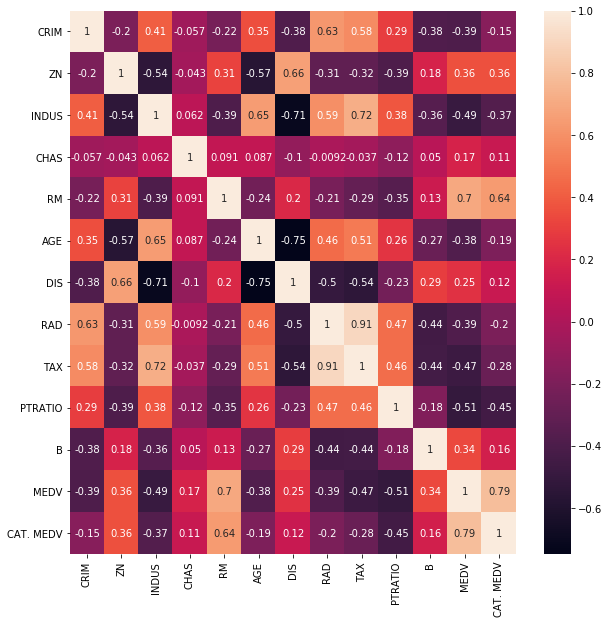

In [52]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

Q7 다음과 같은 단순회귀분석 모형을 Training Set과 Test Set을 통해 구현하라.
- 모집단의 하위계층의 비율(LSTAT)이 독립변수
- 본인 소유의 주택가격(중앙값)인 MEDV가 종속변수 
- Training set이 표본의 75%를 차지한다.
- Training Set에대해서는 회귀 분석 추정 계수 및 R2 값 mean squared error 값을 보고한다.
- Training Set에대해서는 회귀 분석 추정 계수 값을 바탕으로 Test Set에서 예측한 후 mean squared error 값을 보고한다.


In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df[['LSTAT']], df['MEDV'], test_size=0.25, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_hat_train = model.predict(x_train)
y_hat_test = model.predict(x_test)

print("Training Set")
print("R2 = ", model.score(x_train, y_train))
print("MSE = ", mean_squared_error(y_train, y_hat_train))
print("")

print("Teseting Set")
print("MSE = ", mean_squared_error(y_test, y_hat_test))

Training Set
R2 =  0.5411319824508232
MSE =  40.27627752592205

Teseting Set
MSE =  32.07645208363777


Q8. 다음과 같은 다중회귀분석 모형을 Training Set과 Test Set을 통해 구현하라.
- 모집단의 하위계층의 비율(LSTAT)과 10,000 달러 당 재산세율(TAX)가  독립변수
- 본인 소유의 주택가격(중앙값)인 MEDV가 종속변수 
- Training set이 표본의 75%를 차지한다.
- Training Set에대해서는 회귀 분석 추정 계수 및 R2 값 mean squared error 값을 보고한다.
- Training Set에대해서는 회귀 분석 추정 계수 값을 바탕으로 Test Set에서 예측한 후 mean squared error 값을 보고한다.


In [57]:
x_train, x_test, y_train, y_test = train_test_split(df[['LSTAT', 'TAX']], df['MEDV'], test_size=0.25, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
y_hat_train = model.predict(x_train)
y_hat_test = model.predict(x_test)

print("Training Set")
print("R2 = ", model.score(x_train, y_train))
print("MSE = ", mean_squared_error(y_train, y_hat_train))
print("")

print("Teseting Set")
print("MSE = ", mean_squared_error(y_test, y_hat_test))

Training Set
R2 =  0.5482050614575328
MSE =  39.65545131415305

Teseting Set
MSE =  31.56493746549088
